# Task test

In this part, we choose two design variables which are the micro-structure and the yield criterion and each of them do have two levels. 
- **Design variables** \
(1) micro-structure \
&nbsp; (A)$v_{frac} = 0.45$,  $L=0.048$ , $R_{mu}=0.01$, $R_{std}=0.003$ \
&nbsp; (B)$v_{frac} = 0.30$,  $L=0.048$ , $R_{mu}=0.003$, $R_{std}=0.0$ \
&nbsp; (C)$v_{frac} = 0.15$,  $L=0.048$ , $R_{mu}=0.0015$, $R_{std}=0.00005$ \
(2) hardening law \
&nbsp; linear:  (a) $\sigma_{y} = 0.5+0.5\bar\epsilon$ \
&nbsp;  swift:(b) $\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$   
&nbsp;  ramberg: (c) $\sigma_{y} = 0.5(1+ \bar\epsilon)^{1/0.4}$   
&nbsp; swift: (d) $\sigma_{y} = 3+0.5(\bar\epsilon)^{0.4}$   
(3) young's modulus for fibers  \
&nbsp;  (I) $E_{fiber}=1$ MPa \
&nbsp;  (II) $E_{fiber} =10$ MPa \
&nbsp;  (III) $E_{fiber} =1000$ MPa   
 
 - **how to set up the tasks** \
 In order to set up the tasks properly, we select a value from each variable ramdomly and assemble them together as the final tasks. For instance, we may get samples with A, a, and I, in this case, the first task would be "AaI".

 Therefore, we can set up the tasks as: 
 > Task 1: AaII \
 > Task 2: BbI \
 > Task 3: CcIII \
 > Taks 4: BdIV \
 > Task 5: BbI(swap the fiber and matrix property) \
 > Task 6: CcIII(swap the fiber and matrix property) 
 

## Import basic function for simulation 

In [1]:
# import needed libraries
import sys
import os 
import pickle
from collections import OrderedDict
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path) 
# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.coopative_learning_case import CooperativeRVE, CooperativeRVESwap
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.design_of_experiment.path_sampler import StrainPathSampler
from rvesimulator.microstructures.heter_radius_circles import HeterCircleInclusion

## Visualize the design variable information 

Time of generate the 2D RVE with volume fraction            = 0.46  is 0.14 s


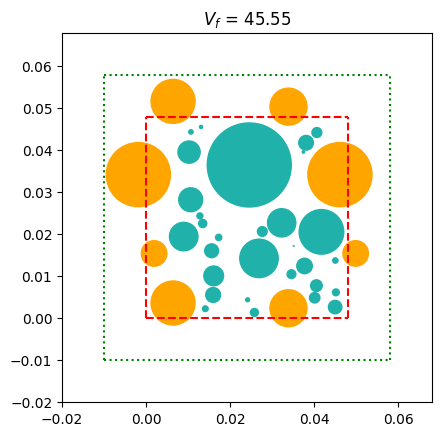

In [2]:
# visualize the micro-structure  
CircleInclusionGenerator = HeterCircleInclusion(
    length=0.048,
    width=0.048,
    radius_mu=0.01,
    radius_std=0.005,
    vol_req=0.45,
    seed=23, 
) 
CircleInclusionGenerator.generate_rve()
CircleInclusionGenerator.plot_rve(save_figure=False)

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.02 s


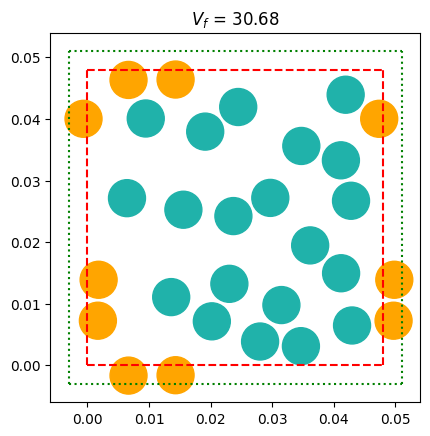

In [3]:
# visualize the micro-structure  
CircleInclusionGenerator = HeterCircleInclusion(
    length=0.048,
    width=0.048,
    radius_mu=0.003,
    radius_std=0.0,
    vol_req=0.30,
    seed=17, 
) 
CircleInclusionGenerator.generate_rve()
CircleInclusionGenerator.plot_rve(save_figure=False)

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.01 s


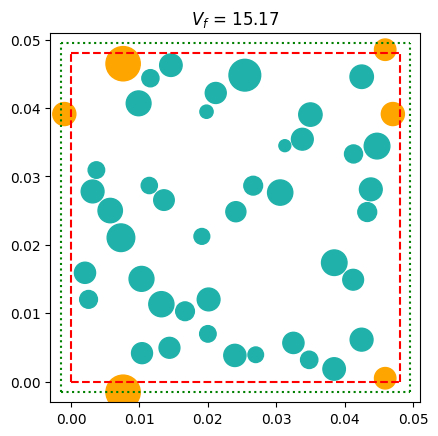

In [4]:
# visualize the micro-structure  
CircleInclusionGenerator = HeterCircleInclusion(
    length=0.048,
    width=0.048,
    radius_mu=0.0015,
    radius_std=0.0003,
    vol_req=0.15,
    seed=17, 
)
CircleInclusionGenerator.generate_rve()
CircleInclusionGenerator.plot_rve(save_figure=False)

[]

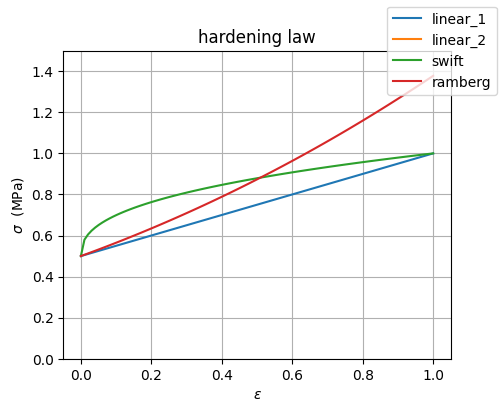

In [5]:
# plot the yield criterion 
x_plot = np.linspace(0,1,100) 
y_plot_linear_1 =0.5 + 0.5 * x_plot 
y_plot_linear_2 =1.5 + 0.5 * x_plot 
y_plot_swift = 0.5 + 0.5*(x_plot)**0.4
y_plot_ramberg = 0.5*(1+0.5*x_plot)**(1/0.4)

fig, ax = plt.subplots(figsize=(5,4)) 
ax.plot(x_plot, y_plot_linear_1, label='linear_1')
ax.plot(x_plot, y_plot_linear_2, label='linear_2')
ax.plot(x_plot, y_plot_swift, label='swift') 
ax.plot(x_plot, y_plot_ramberg, label='ramberg') 

fig.legend() 
plt.grid()
plt.ylim([0,1.5])
plt.title('hardening law') 
plt.xlabel(r'$\epsilon$') 
plt.ylabel(r'$\sigma$  (MPa)')
plt.plot()

## set up the simulation 

In [2]:
# create the doe
# define the design space
doe_variables = OrderedDict({"num_control": 7, "num_increment": 100})

# define number of samples
num_points = 1
# define the information of outputs
name_outputs = ["strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=1,
)
data = doe_sampler.data
print(data)

{'samples':    num_control  num_increment
0          7.0          100.0, 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


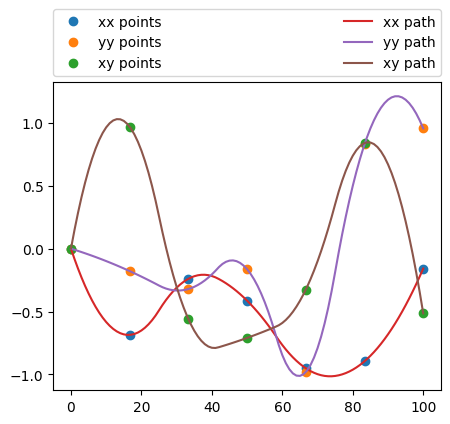

In [50]:
# initialize the strain path generator
strain_path_generator = StrainPathSampler(seed=859, num_dim=3)
data_2d = strain_path_generator.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic"
)
strain_path_generator.plot_path(iteration=0)

## Task 1 
- $v_{frac} = 0.45$
- $L=0.048$ 
- $R_{mu}=0.01$
- $R_{std}=0.003$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law :  linear $\sigma_{y} = 0.5+0.5\bar\epsilon$
- fiber property \
(1) $E=10{MPa}$\
(2) $v=0.19$ 



In [4]:
simulation_wrapper = CooperativeRVE()
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.45, 
                                    radius_mu=0.01,
                                    radius_std=0.005, 
                                    E_fiber=10,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='linear', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    num_cpu=6,
                                    seed=23,
                                    print_info=False) 


Micro-structure file will be updated 



results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.46  is 0.14 s


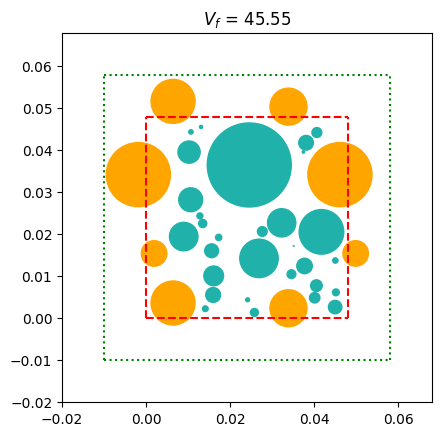

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/tasks/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


simulation time :40.006774 s
simulation time :60.018831 s
simulation time :80.018884 s
simulation time :100.018914 s
simulation time :120.018890 s
simulation time :140.018894 s
simulation time :160.018975 s
simulation time :180.019030 s
simulation time :200.019954 s
simulation time :220.019070 s
simulation time :240.019421 s
simulation time :260.019182 s
simulation time :280.019615 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 300.08220982551575
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.


In [9]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_1.pickle') 

## Task 2

- $v_{frac} = 0.15$
- $L=0.048$ 
- $R_{mu}=0.003$
- $R_{std}=0.0$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law: swift $\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$
- fiber property\
(1) $E=1{MPa}$\
(2) $v=0.19$ 


In [10]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.30, 
                                    radius_mu=0.003,
                                    radius_std=0.0, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='swift', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=False) 


Micro-structure file will be updated 



results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s


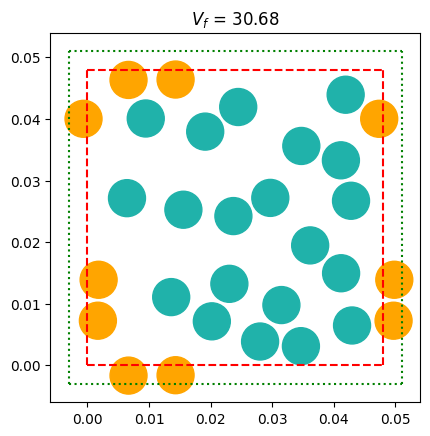

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/tasks/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<14 out of 30 licenses remain available>.


simulation time :40.006407 s
simulation time :60.020519 s
simulation time :80.018478 s
simulation time :100.018864 s
simulation time :120.018876 s
simulation time :140.018644 s
simulation time :160.019207 s
simulation time :180.018777 s
simulation time :200.018794 s
simulation time :220.018745 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 240.08430218696594
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.


In [12]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_2.pickle')

## Task 3

- $v_{frac} = 0.15$
- $L=0.048$ 
- $R_{mu}=0.0015$
- $R_{std}=0.0005$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law:ramberg  $\sigma_{y} = 0.5(1+0.5\bar\epsilon)^{1/0.4}$
- fiber property \  
(1) $E=1000{MPa}$\
(2) $v=0.19$ 

In [51]:
simulation_wrapper.update_sim_info( mesh_partition=80, 
                                    vol_req=0.15, 
                                    radius_mu=0.0015,
                                    radius_std=0.0003, 
                                    E_fiber=1000,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='ramberg', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=False) 


Micro-structure file will be updated 



remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.01 s


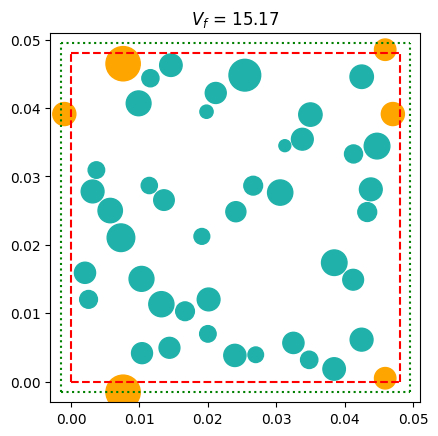

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/tasks/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


simulation time :40.008740 s
simulation time :60.016887 s
simulation time :80.016824 s
simulation time :100.017976 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 120.06982254981995
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


In [52]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_3.pickle')

## Task 4 
- $v_{frac} = 0.30$
- $L=0.048$ 
- $R_{mu}=0.003$
- $R_{std}=0.0$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law :  linear $\sigma_{y} = 1.5+0.5\bar\epsilon$
- fiber property \
(1) $E=1{MPa}$\
(2) $v=0.19$ 

In [41]:
simulation_wrapper.update_sim_info( mesh_partition=50, 
                                    vol_req=0.30, 
                                    radius_mu=0.003,
                                    radius_std=0.0, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='swift', 
                                    yield_stress = 3,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=False) 

Micro-structure file will be updated 



remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.02 s


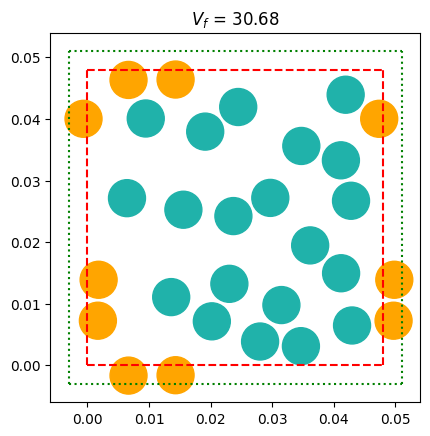

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/tasks/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<15 out of 30 licenses remain available>.


simulation time :40.007799 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 60.075531005859375
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


In [42]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_4.pickle')

In [17]:
simulation_wrapper = CooperativeRVESwap()
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.30, 
                                    radius_mu=0.003,
                                    radius_std=0.0, 
                                    E_fiber=100,
                                    Pr_fiber=0.30, 
                                    E_matrix= 1.0, 
                                    Pr_matrix = 0.19, 
                                    update_micro_structure=True,
                                    hardening_law='swift', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=23,
                                    print_info=True) 

Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0.0, 'seed': 23}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 1.0, 'Pr_matrix': 0.19, 'yield_table_fiber': [[0.5, 0.5792446596230557, 0.6045639552591273, 0.6229754742924681, 0.6379729661461215, 0.6508544084136291, 0.6622671111599604, 0.6725874532990042, 0.682056420302608, 0.6908389454809087, 0.6990535852767487, 0.7067888311395025, 0.7141127368338324, 0.7210789255640928, 0.7277305099281833, 0.7341027460023103, 0.7402248867962862, 0.7461215111265916, 0.7518134982456163, 0.7573187569288689, 0.7626527804403767, 0.7678290755153834, 0.7728594985480539, 0.7777545223286737, 0.7825234500494767, 0.7871745887492587, 0.7917153911869923, 0.796152572875223, 0.8004922093745831, 0.8047398177595422, 0.808900425283706, 0.8129786276126214, 0.8169786384922226, 0.8209043

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.02 s


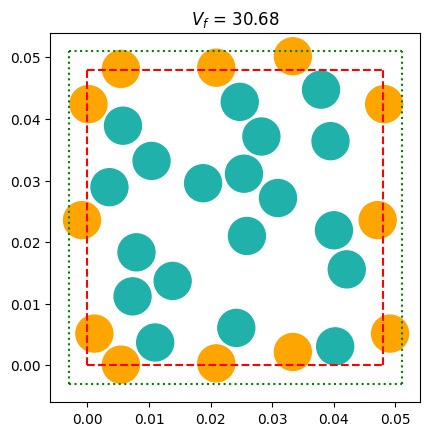

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/tasks/Data/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


simulation time :40.006556 s
simulation time :60.018600 s
simulation time :80.018632 s
simulation time :100.018658 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 120.08596777915955
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


In [18]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_5.pickle')

In [19]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.15, 
                                    radius_mu=0.0015,
                                    radius_std=0.0003, 
                                    E_fiber=100,
                                    Pr_fiber=0.3, 
                                    E_matrix=1000,
                                    Pr_matrix = 0.19,
                                    update_micro_structure=True,
                                    hardening_law='ramberg', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=False) 

Micro-structure file will be updated 



remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.02 s


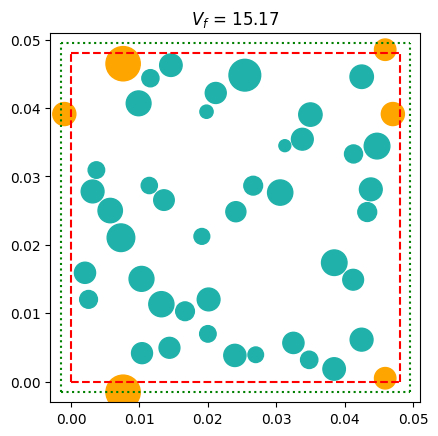

micro-structure be generated successfully

Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/cooperative_learning/tasks/Data/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


simulation time :40.008176 s
simulation time :60.020304 s
simulation time :80.020311 s
simulation time :100.020368 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 120.06615614891052
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


In [20]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_6.pickle')

# plot all results together 

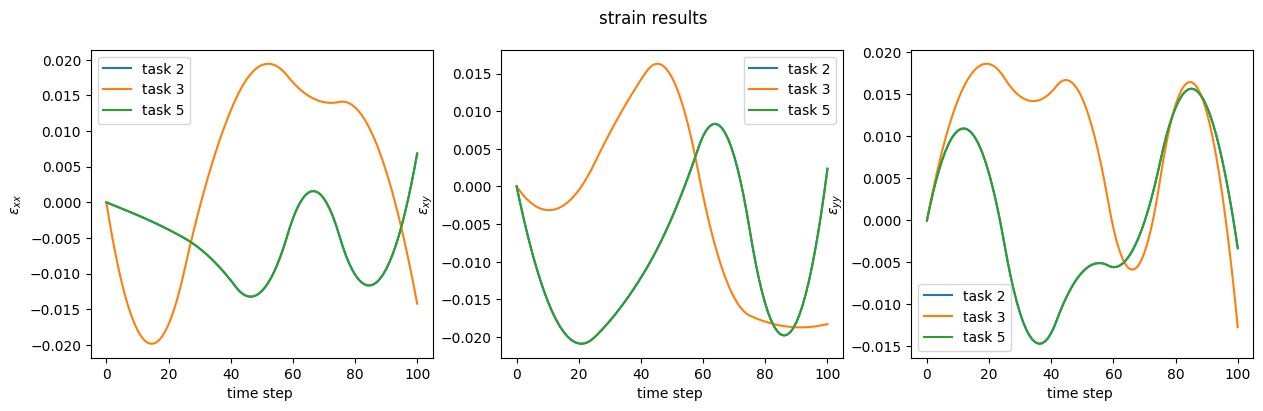

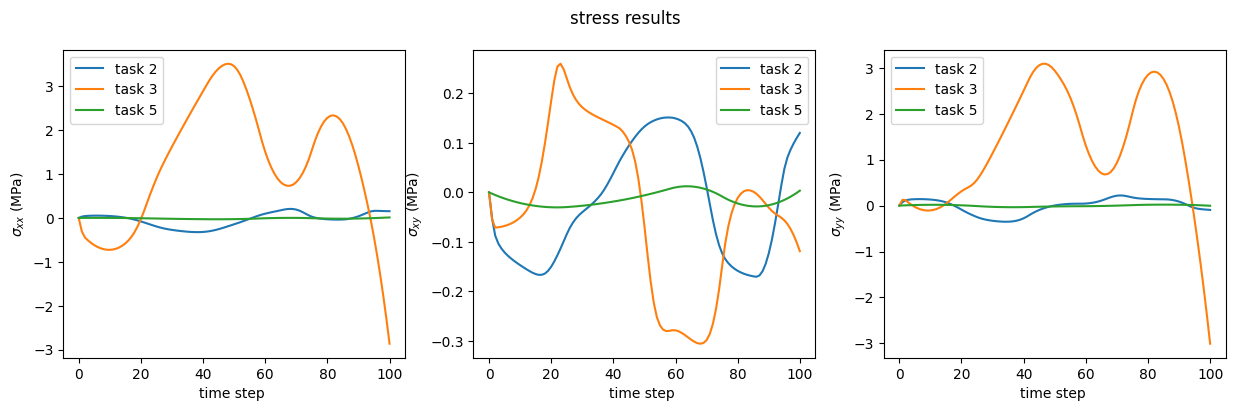

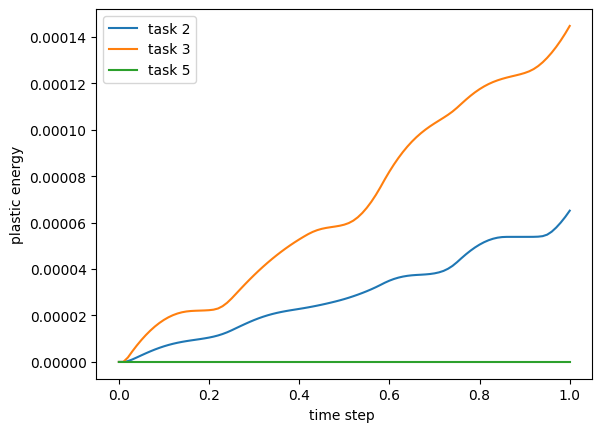

In [11]:
with open("task_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_4.pickle", "rb") as fd:
    benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_5.pickle", "rb") as fd:
    benchmark_5 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_6.pickle", "rb") as fd:
    benchmark_6 = pickle.load(fd, fix_imports=True, encoding="latin1")
results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
results_4 =benchmark_4["responses"]
results_5 =benchmark_5["responses"]
results_6 =benchmark_6["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]

# result of benchmark5
stress_5 = results_5["stress"].iloc[0]
strain_5 = results_5["strain"].iloc[0]
plastic_energy_5 = results_5["plastic_energy"].iloc[0]

# result of benchmark4
stress_6 = results_6["stress"].iloc[0]
strain_6 = results_6["strain"].iloc[0]
plastic_energy_6 = results_6["plastic_energy"].iloc[0]

pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(1,3, figsize=(15,4))
# ax[0].plot(strain_1[:, 0, 0], label="task 1") 
ax[0].plot(strain_2[:, 0, 0], label="task 2") 
ax[0].plot(strain_3[:, 0, 0], label="task 3") 
ax[0].plot(strain_4[:, 0, 0], label="task 4") 
ax[0].plot(strain_5[:, 0, 0], label="task 5")
# ax[0].plot(strain_6[:, 0, 0], label="task 6")
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
# ax[1].plot(strain_1[:, 0, 1], label="task 1")
ax[1].plot(strain_2[:, 0, 1], label="task 2")
ax[1].plot(strain_3[:, 0, 1], label="task 3")
ax[1].plot(strain_4[:, 0, 1], label="task 4")
ax[1].plot(strain_5[:, 0, 1], label="task 5")
# ax[1].plot(strain_6[:, 0, 1], label="task 6")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
# ax[2].plot(strain_1[:, 1, 1], label="task 1") 
ax[2].plot(strain_2[:, 1, 1], label="task 2") 
ax[2].plot(strain_3[:, 1, 1], label="task 3") 
ax[2].plot(strain_4[:, 1, 1], label="task 4") 
ax[2].plot(strain_5[:, 1, 1], label="task 5") 
# ax[2].plot(strain_6[:, 1, 1], label="task 6")
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(1,3,figsize=(15,4))
# ax[0].plot(stress_1[:, 0, 0], label="task 1") 
ax[0].plot(stress_2[:, 0, 0], label="task 2") 
ax[0].plot(stress_3[:, 0, 0], label="task 3") 
# ax[0].plot(stress_4[:, 0, 0], label="task 4") 
ax[0].plot(stress_5[:, 0, 0], label="task 5") 
# ax[0].plot(stress_6[:, 0, 0], label="task 6") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
# ax[1].plot(stress_1[:, 1, 0], label="task 1")
ax[1].plot(stress_2[:, 1, 0], label="task 2")
ax[1].plot(stress_3[:, 1, 0], label="task 3")
# ax[1].plot(stress_4[:, 1, 0], label="task 4")
ax[1].plot(stress_5[:, 1, 0], label="task 5")
# ax[1].plot(stress_6[:, 1, 0], label="task 6")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
# ax[2].plot(stress_1[:, 1, 1], label="task 1") 
ax[2].plot(stress_2[:, 1, 1], label="task 2") 
ax[2].plot(stress_3[:, 1, 1], label="task 3") 
# ax[2].plot(stress_4[:, 1, 1], label="task 4") 
ax[2].plot(stress_5[:, 1, 1], label="task 5") 
# ax[2].plot(stress_6[:, 1, 1], label="task 6") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
# ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="task 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="task 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="task 3") 
# ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="task 4") 
ax.plot(plastic_energy_5[:,0], plastic_energy_5[:,1], label="task 5") 
# ax.plot(plastic_energy_6[:,0], plastic_energy_6[:,1], label="task 6") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)

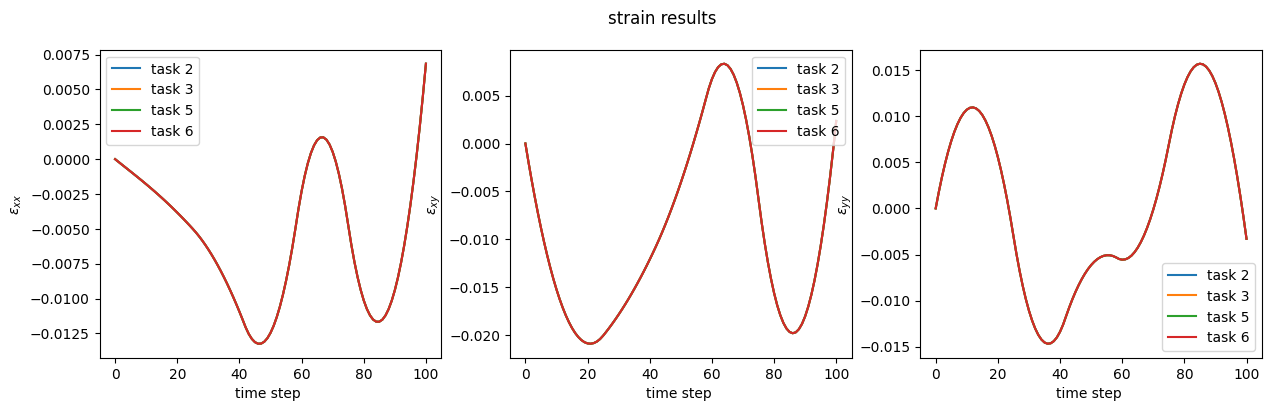

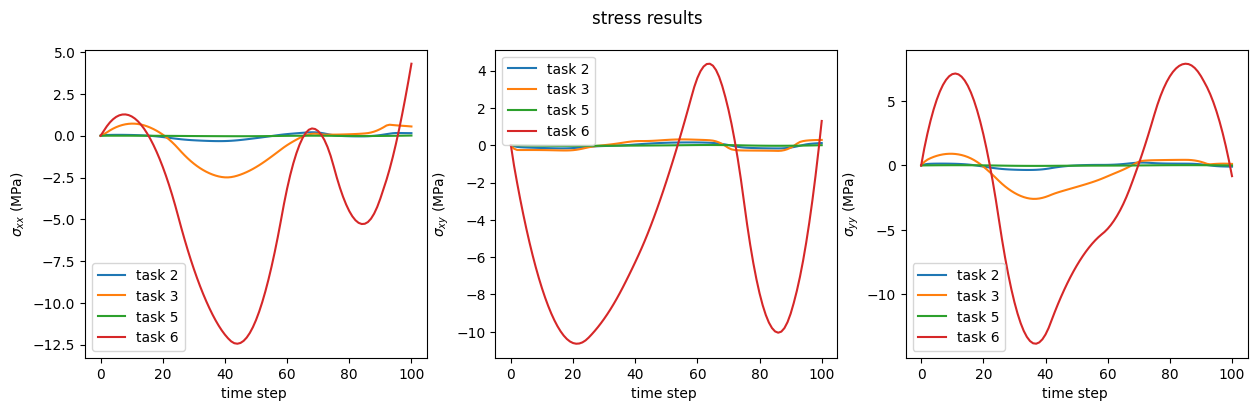

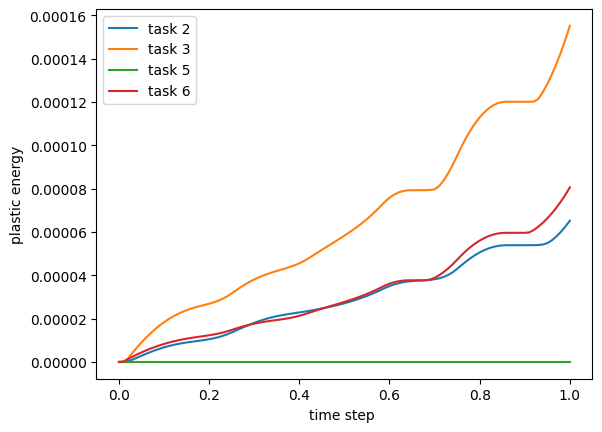

In [33]:
with open("task_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_4.pickle", "rb") as fd:
    benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_5.pickle", "rb") as fd:
    benchmark_5 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_6.pickle", "rb") as fd:
    benchmark_6 = pickle.load(fd, fix_imports=True, encoding="latin1")
results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
results_4 =benchmark_4["responses"]
results_5 =benchmark_5["responses"]
results_6 =benchmark_6["responses"]
# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]

# result of benchmark5
stress_5 = results_5["stress"].iloc[0]
strain_5 = results_5["strain"].iloc[0]
plastic_energy_5 = results_5["plastic_energy"].iloc[0]

# result of benchmark4
stress_6 = results_6["stress"].iloc[0]
strain_6 = results_6["strain"].iloc[0]
plastic_energy_6 = results_6["plastic_energy"].iloc[0]

pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(1,3, figsize=(15,4))
# ax[0].plot(strain_1[:, 0, 0], label="task 1") 
ax[0].plot(strain_2[:, 0, 0], label="task 2") 
ax[0].plot(strain_3[:, 0, 0], label="task 3") 
# ax[0].plot(strain_4[:, 0, 0], label="task 4") 
ax[0].plot(strain_5[:, 0, 0], label="task 5")
ax[0].plot(strain_6[:, 0, 0], label="task 6")
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
# ax[1].plot(strain_1[:, 0, 1], label="task 1")
ax[1].plot(strain_2[:, 0, 1], label="task 2")
ax[1].plot(strain_3[:, 0, 1], label="task 3")
# ax[1].plot(strain_4[:, 0, 1], label="task 4")
ax[1].plot(strain_5[:, 0, 1], label="task 5")
ax[1].plot(strain_6[:, 0, 1], label="task 6")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
# ax[2].plot(strain_1[:, 1, 1], label="task 1") 
ax[2].plot(strain_2[:, 1, 1], label="task 2") 
ax[2].plot(strain_3[:, 1, 1], label="task 3") 
# ax[2].plot(strain_4[:, 1, 1], label="task 4") 
ax[2].plot(strain_5[:, 1, 1], label="task 5") 
ax[2].plot(strain_6[:, 1, 1], label="task 6")
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(1,3,figsize=(15,4))
# ax[0].plot(stress_1[:, 0, 0], label="task 1") 
ax[0].plot(stress_2[:, 0, 0], label="task 2") 
ax[0].plot(stress_3[:, 0, 0], label="task 3") 
# ax[0].plot(stress_4[:, 0, 0], label="task 4") 
ax[0].plot(stress_5[:, 0, 0], label="task 5") 
ax[0].plot(stress_6[:, 0, 0], label="task 6") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
# ax[1].plot(stress_1[:, 1, 0], label="task 1")
ax[1].plot(stress_2[:, 1, 0], label="task 2")
ax[1].plot(stress_3[:, 1, 0], label="task 3")
# ax[1].plot(stress_4[:, 1, 0], label="task 4")
ax[1].plot(stress_5[:, 1, 0], label="task 5")
ax[1].plot(stress_6[:, 1, 0], label="task 6")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
# ax[2].plot(stress_1[:, 1, 1], label="task 1") 
ax[2].plot(stress_2[:, 1, 1], label="task 2") 
ax[2].plot(stress_3[:, 1, 1], label="task 3") 
# ax[2].plot(stress_4[:, 1, 1], label="task 4") 
ax[2].plot(stress_5[:, 1, 1], label="task 5") 
ax[2].plot(stress_6[:, 1, 1], label="task 6") 
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
# ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="task 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="task 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="task 3") 
# ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="task 4") 
ax.plot(plastic_energy_5[:,0], plastic_energy_5[:,1], label="task 5") 
ax.plot(plastic_energy_6[:,0], plastic_energy_6[:,1], label="task 6") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)

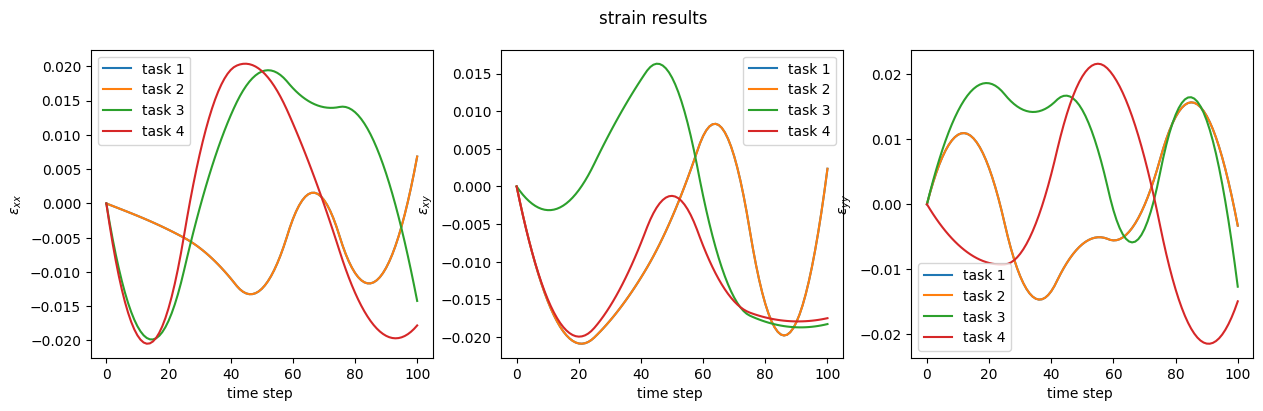

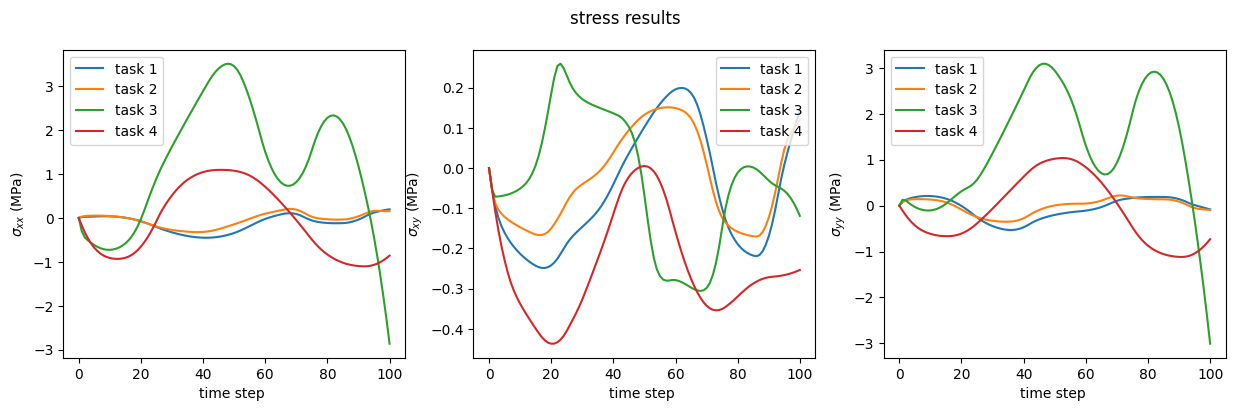

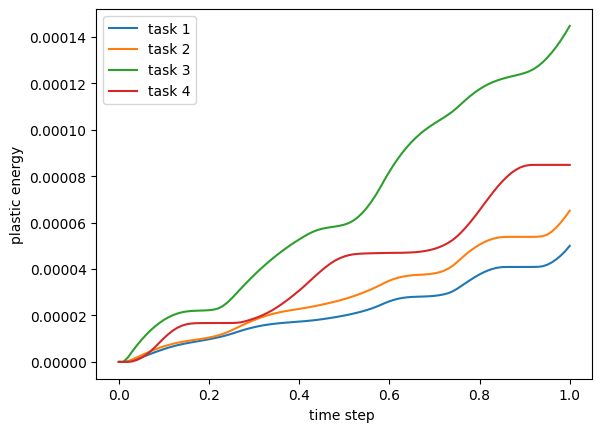

In [12]:
# os.chdir('..')
with open("task_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_4.pickle", "rb") as fd:
    benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")
results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
results_4 =benchmark_4["responses"]

# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(strain_1[:, 0, 0], label="task 1") 
ax[0].plot(strain_2[:, 0, 0], label="task 2") 
ax[0].plot(strain_3[:, 0, 0], label="task 3") 
ax[0].plot(strain_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="task 1")
ax[1].plot(strain_2[:, 0, 1], label="task 2")
ax[1].plot(strain_3[:, 0, 1], label="task 3")
ax[1].plot(strain_4[:, 0, 1], label="task 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="task 1") 
ax[2].plot(strain_2[:, 1, 1], label="task 2") 
ax[2].plot(strain_3[:, 1, 1], label="task 3") 
ax[2].plot(strain_4[:, 1, 1], label="task 4") 

ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(stress_1[:, 0, 0], label="task 1") 
ax[0].plot(stress_2[:, 0, 0], label="task 2") 
ax[0].plot(stress_3[:, 0, 0], label="task 3") 
ax[0].plot(stress_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="task 1")
ax[1].plot(stress_2[:, 1, 0], label="task 2")
ax[1].plot(stress_3[:, 1, 0], label="task 3")
ax[1].plot(stress_4[:, 1, 0], label="task 4")

ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="task 1") 
ax[2].plot(stress_2[:, 1, 1], label="task 2") 
ax[2].plot(stress_3[:, 1, 1], label="task 3") 
ax[2].plot(stress_4[:, 1, 1], label="task 4") 

ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="task 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="task 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="task 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="task 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)